# Algoritmos de optimización - Reto 1

Nombre: <br>
**Edgar Roberto Valarezo Vargas**
<br><br>
Github: <br>
**https://github.com/robvalec**

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás.

In [ ]:
#Torres de Hanoi con 'Divide y Vencerás'

def torres_hanoi(n, origen, destino, pivote):
    if n == 1:
        print(f'Ficha 1 - {origen}  ==>  {destino}')
        return
    torres_hanoi(n-1, origen, pivote, destino)
    print(f'Ficha {n} - {origen}  ==>  {destino}')
    torres_hanoi(n-1, pivote, destino, origen)

num_fichas = 3
torre_origen = 'Torre A'
torre_auxiliar = 'Torre B'
torre_destino = 'Torre C'

torres_hanoi(num_fichas, torre_origen, torre_destino, torre_auxiliar)

Ficha 1 - Torre A  ==>  Torre C
Ficha 2 - Torre A  ==>  Torre B
Ficha 1 - Torre C  ==>  Torre B
Ficha 3 - Torre A  ==>  Torre C
Ficha 1 - Torre B  ==>  Torre A
Ficha 2 - Torre B  ==>  Torre C
Ficha 1 - Torre A  ==>  Torre C



## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

In [ ]:
# Sucesión de Fibonacci - Recursivo

def fibonacci_recursivo(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)

# Sucesión de Fibonacci - Iterativo

def fibonacci_iterativo(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

In [ ]:
# Número de términos
n = 15

f_recursivo = [fibonacci_recursivo(i) for i in range(n)]
f_iterativo = [fibonacci_iterativo(i) for i in range(n)]

print('Fibonacci Recursivo: ', f_recursivo)
print('Fibonacci Iterativo: ', f_iterativo)

Fibonacci Recursivo:  [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
Fibonacci Iterativo:  [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


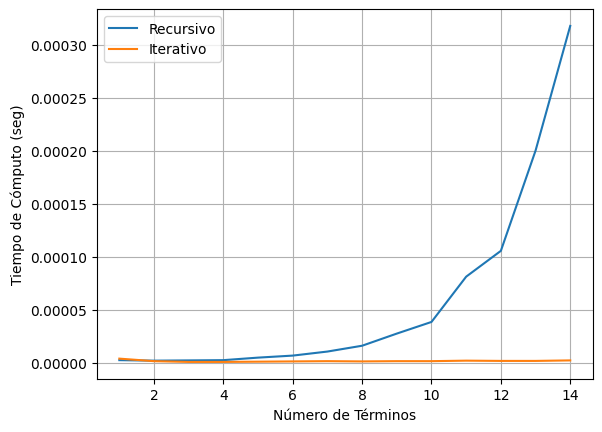

In [ ]:
import time
import matplotlib.pyplot as plt

n_values = list(range(1, n))

tiempo_recursivo = []
tiempo_iterativo = []

for n in n_values:
    inicio = time.time()
    fibonacci_recursivo(n)
    tiempo_recursivo.append(time.time() - inicio)

    inicio = time.time()
    fibonacci_iterativo(n)
    tiempo_iterativo.append(time.time() - inicio)

plt.plot(n_values, tiempo_recursivo, label='Recursivo')
plt.plot(n_values, tiempo_iterativo, label='Iterativo')
plt.xlabel('Número de Términos')
plt.ylabel('Tiempo de Cómputo (seg)')
plt.legend()
plt.grid(True)
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [ ]:
# Cambio de Moneda

from collections import Counter

def cambio_moneda(monedas, monto):

    monedas.sort(reverse=True)
    cambio = []

    for moneda in monedas:
        while monto >= moneda:
            monto -= moneda
            cambio.append(moneda)

    conteo = Counter(cambio)

    return [cambio, conteo] if monto == 0 else None

In [ ]:
# Monedas: Siempre agregar moneda de ¢1
monedas = [11, 5, 1]
monto = 15

resultado = cambio_moneda(monedas, monto)
cambio = resultado[0]
conteo = resultado[1]

# print(f'Para: ¢ {monto} ==> Cambio: {cambio}')

print('Se entregan:')
for res, num in conteo.items():
    print(f'* {num} monedas de ¢ {res}')

Se entregan:
* 1 monedas de ¢ 11
* 4 monedas de ¢ 1


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [ ]:
import numpy as np

# Problema N-Reinas mediante backtracking

# Función para verificar si es posible colocar una reina en una fila y columna determinada
def verificacion(tablero, fila, columna):

    tamano, _ = tablero.shape

    # Comprueba la misma columna
    for i in range(fila):
        if tablero[i][columna] == 1:
            return False

    # Comprueba la diagonal superior izquierda
    for i, j in zip(range(fila, -1, -1), range(columna, -1, -1)):
        if tablero[i][j] == 1:
            return False

    # Comprueba la diagonal superior derecha
    for i, j in zip(range(fila, -1, -1), range(columna, tamano)):
        if tablero[i][j] == 1:
            return False

    return True


def n_reinas(tablero, fila, N):

    if fila >= N:
        return True

    for columna in range(N):
        if verificacion(tablero, fila, columna):
            tablero[fila][columna] = 1
            if n_reinas(tablero, fila + 1, N):
                return True
            tablero[fila][columna] = 0

    return False

import pandas as pd
def resuelve(N):
    # Tablero de 0's
    tablero = np.zeros((N, N), dtype=int)

    if n_reinas(tablero, 0, N):
        for fila in tablero:
            print(" ".join(map(str, fila)))
        # df = pd.DataFrame(tablero, columns=[str(i).zfill(2) for i in range(0,n)])
        # print(df)

    else:
        print("No hay solución para N = ", N)

In [ ]:
tamano_tablero = 10
resuelve(tamano_tablero)

1 0 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0
0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0 0 1
0 0 0 0 1 0 0 0 0 0
0 0 0 0 0 0 0 0 1 0
0 1 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0
